<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/occupancy/clustering_by_age%2C_month.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/content/Time use survey_Korea_2019_onehot_only.xlsx')
df_c = pd.read_csv('/content/2019_시간대_전체_20221223_31968.csv', encoding = 'cp949')
df_n = pd.read_csv('/content/2019_시간대_전체_20221223_21944.csv', encoding = 'cp949')

In [3]:
df_cc = df_c.loc[:,['평토일구분코드', '연령코드']]

In [4]:
total = pd.concat([df_n, df_cc, df], axis=1)
total = total.drop(['Unnamed: 0'], axis=1)

In [5]:
t5_wd = total[(total['회차'] == 5) & (total['평토일구분코드'] == 1)]
t5_we = total[(total['회차'] == 5) & ~(total['평토일구분코드'] == 1)]

In [6]:
t5_wd_1 = t5_wd[(t5_wd['연령코드'] == 1)]
t5_wd_2 = t5_wd[(t5_wd['연령코드'] == 2)]
t5_wd_3 = t5_wd[(t5_wd['연령코드'] == 3)]
t5_wd_4 = t5_wd[(t5_wd['연령코드'] == 4)]
t5_wd_5 = t5_wd[(t5_wd['연령코드'] == 5)]
t5_wd_6 = t5_wd[(t5_wd['연령코드'] == 6)]

In [7]:
t5_wd_1 = t5_wd_1.drop(['회차', '평토일구분코드','연령코드'], axis=1)

In [8]:
t5_wd_2 = t5_wd_2.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_wd_3 = t5_wd_3.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_wd_4 = t5_wd_4.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_wd_5 = t5_wd_5.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_wd_6 = t5_wd_6.drop(['회차', '평토일구분코드','연령코드'], axis=1)

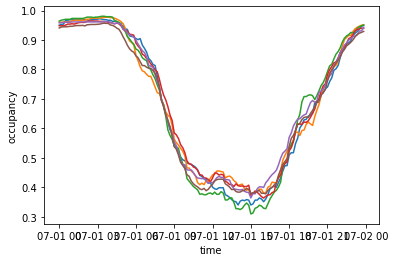

In [9]:
a1 = (t5_wd_1.sum(axis=0)) / len(t5_wd_1)
a2 = t5_wd_2.sum(axis=0) / len(t5_wd_2)
a3 = t5_wd_3.sum(axis=0) / len(t5_wd_3)
a4 = t5_wd_4.sum(axis=0) / len(t5_wd_4)
a5 = t5_wd_5.sum(axis=0) / len(t5_wd_5)
a6 = t5_wd_6.sum(axis=0) / len(t5_wd_6)

ts = pd.date_range('2019-07-01 00:00:00', '2019-07-01 23:50:00', freq='10min')
plt.plot(ts, a1)
plt.plot(ts, a2)
plt.plot(ts, a3)
plt.plot(ts, a4)
plt.plot(ts, a5)
plt.plot(ts, a6)
plt.xlabel('time')
plt.ylabel('occupancy')
plt.show()

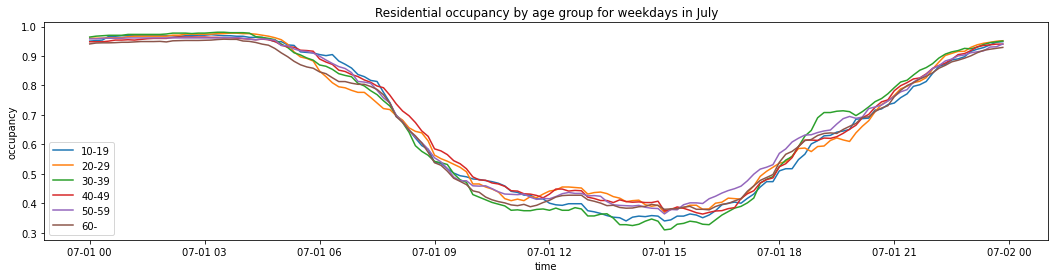

In [10]:
plt.figure(figsize=(18,4))
plt.plot(ts, a1)
plt.plot(ts, a2)
plt.plot(ts, a3)
plt.plot(ts, a4)
plt.plot(ts, a5)
plt.plot(ts, a6)
plt.xlabel('time')
plt.ylabel('occupancy')
plt.title("Residential occupancy by age group for weekdays in July") 
plt.legend(labels=['10-19','20-29','30-39','40-49','50-59','60-'])
plt.show()

In [11]:
t5_we_1 = t5_we[(t5_we['연령코드'] == 1)]
t5_we_2 = t5_we[(t5_we['연령코드'] == 2)]
t5_we_3 = t5_we[(t5_we['연령코드'] == 3)]
t5_we_4 = t5_we[(t5_we['연령코드'] == 4)]
t5_we_5 = t5_we[(t5_we['연령코드'] == 5)]
t5_we_6 = t5_we[(t5_we['연령코드'] == 6)]

t5_we_1 = t5_we_1.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_we_2 = t5_we_2.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_we_3 = t5_we_3.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_we_4 = t5_we_4.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_we_5 = t5_we_5.drop(['회차', '평토일구분코드','연령코드'], axis=1)
t5_we_6 = t5_we_6.drop(['회차', '평토일구분코드','연령코드'], axis=1)

e1 = (t5_we_1.sum(axis=0)) / len(t5_we_1)
e2 = (t5_we_2.sum(axis=0)) / len(t5_we_2)
e3 = (t5_we_3.sum(axis=0)) / len(t5_we_3)
e4 = (t5_we_4.sum(axis=0)) / len(t5_we_4)
e5 = (t5_we_5.sum(axis=0)) / len(t5_we_5)
e6 = (t5_we_6.sum(axis=0)) / len(t5_we_6)

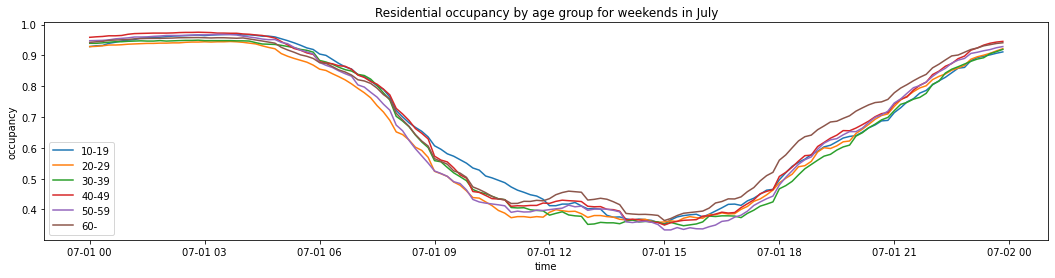

In [12]:
plt.figure(figsize=(18,4))
plt.plot(ts, e1)
plt.plot(ts, e2)
plt.plot(ts, e3)
plt.plot(ts, e4)
plt.plot(ts, e5)
plt.plot(ts, e6)
plt.xlabel('time')
plt.ylabel('occupancy')
plt.title("Residential occupancy by age group for weekends in July") 
plt.legend(labels=['10-19','20-29','30-39','40-49','50-59','60-'])
plt.show()

## **k-means for July** 

In [13]:
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 4.9 MB/s 


In [14]:
t5_wd_km = t5_wd.drop(['회차', '평토일구분코드','연령코드'], axis=1)

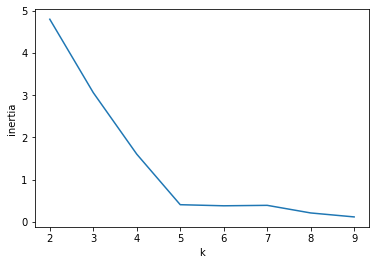

In [15]:
inertia = []

for k in range(2, 10):
  km = TimeSeriesKMeans(n_clusters=k, random_state=42, metric="dtw", max_iter=2)
  km.fit(t5_wd_km)
  inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [16]:
# cluster labels 
tkm = TimeSeriesKMeans(n_clusters=5, random_state=42, metric="dtw", max_iter=2)
cluster5 = tkm.fit(t5_wd_km)
t5_wd_km['cluster'] = cluster5.labels_
t5_wd_km.head()

,(주행동시간대) 오전 00:00,(주행동시간대) 오전 00:10,(주행동시간대) 오전 00:20,(주행동시간대) 오전 00:30,(주행동시간대) 오전 00:40,(주행동시간대) 오전 00:50,(주행동시간대) 오전 01:00,(주행동시간대) 오전 01:10,(주행동시간대) 오전 01:20,(주행동시간대) 오전 01:30,...,(주행동시간대) 오후 10:30,(주행동시간대) 오후 10:40,(주행동시간대) 오후 10:50,(주행동시간대) 오후 11:00,(주행동시간대) 오후 11:10,(주행동시간대) 오후 11:20,(주행동시간대) 오후 11:30,(주행동시간대) 오후 11:40,(주행동시간대) 오후 11:50,cluster
10452,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
10453,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
10454,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10455,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
10456,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [17]:
t5_wd_km1 = t5_wd_km[t5_wd_km['cluster'] == 1]
t5_wd_km1 = t5_wd_km1.drop(['cluster'], axis=1)
t5_wd_km1_rate = t5_wd_km1.sum(axis=0) / len(t5_wd_km1)

In [23]:
t5_wd_km2 = t5_wd_km[t5_wd_km['cluster'] == 2]
t5_wd_km2 = t5_wd_km2.drop(['cluster'], axis=1)
t5_wd_km2_rate = t5_wd_km2.sum(axis=0) / len(t5_wd_km2)

t5_wd_km3 = t5_wd_km[t5_wd_km['cluster'] == 3]
t5_wd_km3 = t5_wd_km3.drop(['cluster'], axis=1)
t5_wd_km3_rate = t5_wd_km3.sum(axis=0) / len(t5_wd_km3)

t5_wd_km4 = t5_wd_km[t5_wd_km['cluster'] == 4]
t5_wd_km4 = t5_wd_km4.drop(['cluster'], axis=1)
t5_wd_km4_rate = t5_wd_km4.sum(axis=0) / len(t5_wd_km4)

t5_wd_km0 = t5_wd_km[t5_wd_km['cluster'] == 0]
t5_wd_km0 = t5_wd_km0.drop(['cluster'], axis=1)
t5_wd_km0_rate = t5_wd_km0.sum(axis=0) / len(t5_wd_km0)

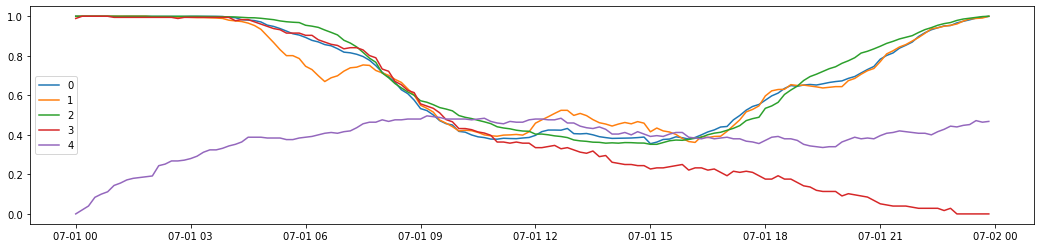

In [61]:
ts = pd.date_range('2019-07-01 00:00:00', '2019-07-01 23:50:00', freq='10min')
plt.figure(figsize=(18,4))
plt.plot(ts, t5_wd_km0_rate)
plt.plot(ts, t5_wd_km1_rate)
plt.plot(ts, t5_wd_km2_rate)
plt.plot(ts, t5_wd_km3_rate)
plt.plot(ts, t5_wd_km4_rate)

plt.legend(labels=['0','1','2','3','4'])
plt.show()

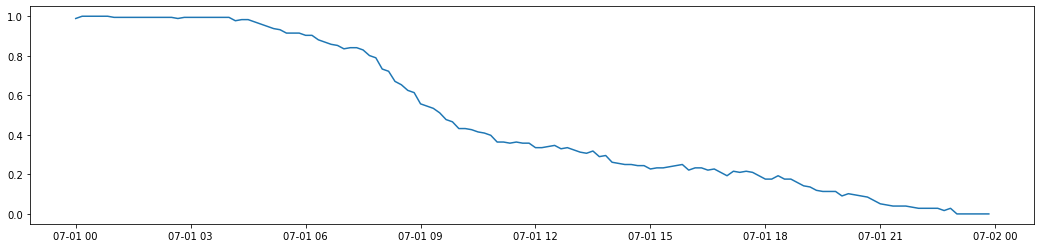

In [62]:

plt.figure(figsize=(18,4))

plt.plot(ts, t5_wd_km3_rate)


plt.show()

## **k-means by economic activity**

In [37]:
t5_wd_km3.to_excel(excel_writer='t5_wd_km3.xlsx')

In [38]:
df_w = pd.read_csv('/content/2019_시간대_전체_20221226_91579.csv', encoding = 'cp949')

In [45]:
t2 = pd.concat([df_w, df], axis=1)
t2 = t2.drop(['Unnamed: 0'], axis=1)

In [44]:
t2r = t2[t2['경제활동상태코드'] == 1]
t2r

,회차,평토일구분코드,연령코드,경제활동상태코드,취업형태코드,(주행동시간대) 오전 00:00,(주행동시간대) 오전 00:10,(주행동시간대) 오전 00:20,(주행동시간대) 오전 00:30,(주행동시간대) 오전 00:40,...,(주행동시간대) 오후 10:20,(주행동시간대) 오후 10:30,(주행동시간대) 오후 10:40,(주행동시간대) 오후 10:50,(주행동시간대) 오후 11:00,(주행동시간대) 오후 11:10,(주행동시간대) 오후 11:20,(주행동시간대) 오후 11:30,(주행동시간대) 오후 11:40,(주행동시간대) 오후 11:50
521,5,1,1,1.0,NaN,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
522,5,1,1,1.0,1.0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
523,5,1,1,1.0,1.0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
524,5,1,1,1.0,1.0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
525,5,1,1,1.0,1.0,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51588,7,3,6,1.0,2.0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
51589,7,3,6,1.0,2.0,1,1,1,1,1,...,0,0,0,0,0,0,1,1,1,1
51590,7,3,6,1.0,2.0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
51591,7,3,6,1.0,2.0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [46]:
x_t2 = t2r.iloc[:,5:]
x_t2

,(주행동시간대) 오전 00:00,(주행동시간대) 오전 00:10,(주행동시간대) 오전 00:20,(주행동시간대) 오전 00:30,(주행동시간대) 오전 00:40,(주행동시간대) 오전 00:50,(주행동시간대) 오전 01:00,(주행동시간대) 오전 01:10,(주행동시간대) 오전 01:20,(주행동시간대) 오전 01:30,...,(주행동시간대) 오후 10:20,(주행동시간대) 오후 10:30,(주행동시간대) 오후 10:40,(주행동시간대) 오후 10:50,(주행동시간대) 오후 11:00,(주행동시간대) 오후 11:10,(주행동시간대) 오후 11:20,(주행동시간대) 오후 11:30,(주행동시간대) 오후 11:40,(주행동시간대) 오후 11:50
521,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
522,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
523,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
524,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
525,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51588,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
51589,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,1,1
51590,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
51591,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


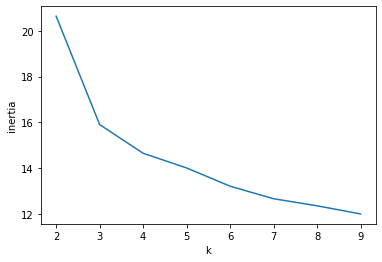

In [47]:
inertia = []

for k in range(2, 10):
  km = TimeSeriesKMeans(n_clusters=k, random_state=42, metric="euclidean", max_iter=2)
  km.fit(x_t2)
  inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

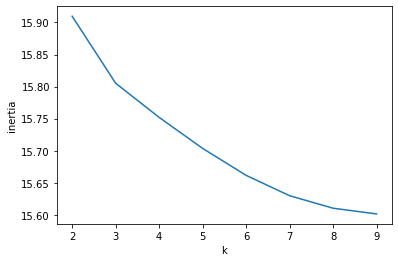

In [48]:
inertia = []

for k in range(2, 10):
  km = TimeSeriesKMeans(n_clusters=3, random_state=42, metric="euclidean", max_iter=k, n_jobs=-1)
  km.fit(x_t2)
  inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [49]:
# cluster labels 
tkm = TimeSeriesKMeans(n_clusters=3, random_state=42, metric="euclidean", max_iter=2)
cluster5 = tkm.fit(x_t2)
x_t2['cluster'] = cluster5.labels_
x_t2.head()

,(주행동시간대) 오전 00:00,(주행동시간대) 오전 00:10,(주행동시간대) 오전 00:20,(주행동시간대) 오전 00:30,(주행동시간대) 오전 00:40,(주행동시간대) 오전 00:50,(주행동시간대) 오전 01:00,(주행동시간대) 오전 01:10,(주행동시간대) 오전 01:20,(주행동시간대) 오전 01:30,...,(주행동시간대) 오후 10:30,(주행동시간대) 오후 10:40,(주행동시간대) 오후 10:50,(주행동시간대) 오후 11:00,(주행동시간대) 오후 11:10,(주행동시간대) 오후 11:20,(주행동시간대) 오후 11:30,(주행동시간대) 오후 11:40,(주행동시간대) 오후 11:50,cluster
521,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
522,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
523,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
524,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
525,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,2


In [50]:
x_t2_0 = x_t2[x_t2['cluster'] == 0]
x_t2_0 = x_t2_0.drop(['cluster'], axis=1)
x_t2_0_rate = x_t2_0.sum(axis=0) / len(x_t2_0)

x_t2_1 = x_t2[x_t2['cluster'] == 1]
x_t2_1 = x_t2_1.drop(['cluster'], axis=1)
x_t2_1_rate = x_t2_1.sum(axis=0) / len(x_t2_1)

x_t2_2 = x_t2[x_t2['cluster'] == 2]
x_t2_2 = x_t2_2.drop(['cluster'], axis=1)
x_t2_2_rate = x_t2_2.sum(axis=0) / len(x_t2_2)

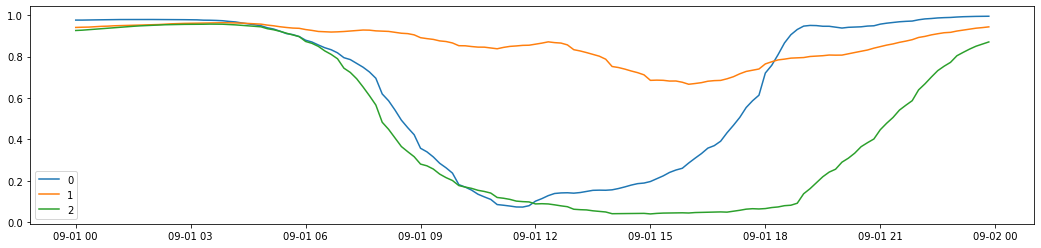

In [51]:
plt.figure(figsize=(18,4))

plt.plot(ts, x_t2_0_rate)
plt.plot(ts, x_t2_1_rate)
plt.plot(ts, x_t2_2_rate)

plt.legend(labels=['0','1','2'])
plt.show()

In [57]:
list_0 = x_t2_0.index.to_list()

In [54]:
c_t2 = t2r.iloc[:,:5]
c_t2

,회차,평토일구분코드,연령코드,경제활동상태코드,취업형태코드
521,5,1,1,1.0,NaN
522,5,1,1,1.0,1.0
523,5,1,1,1.0,1.0
524,5,1,1,1.0,1.0
525,5,1,1,1.0,1.0
...,...,...,...,...,...
51588,7,3,6,1.0,2.0
51589,7,3,6,1.0,2.0
51590,7,3,6,1.0,2.0
51591,7,3,6,1.0,2.0


In [70]:
c_t2_0 = c_t2.loc[list_0]
c_t2_0

,회차,평토일구분코드,연령코드,경제활동상태코드,취업형태코드
526,5,1,1,1.0,1.0
527,5,1,1,1.0,1.0
552,5,1,1,1.0,2.0
554,5,1,1,1.0,2.0
555,5,1,1,1.0,2.0
...,...,...,...,...,...
51572,7,3,6,1.0,2.0
51577,7,3,6,1.0,2.0
51582,7,3,6,1.0,2.0
51584,7,3,6,1.0,2.0


In [65]:
# Statistics for each cluster
stat_0 = c_t2_0.groupby('평토일구분코드').sum().reset_index()

In [ ]:
p_stat_0 = stat_0.pi

In [66]:
stat_0

,평토일구분코드,회차,연령코드,경제활동상태코드,취업형태코드
0,1,30492,22179,5070.0,4720.0
1,2,10555,7545,1747.0,1525.0
2,3,11816,8239,1959.0,1824.0


In [67]:
age_1 = c_t2_0[c_t2_0['연령코드'] == 1].sum()

In [69]:
print(c_t2_0['연령코드'].value_counts())

6    2200
5    2103
4    1923
3    1541
2     924
1      85
Name: 연령코드, dtype: int64
